In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean01=[4,5]
cov01=[[3,0.8],[0.8,2]]
dist01=np.random.multivariate_normal(mean01,cov01,500)

mean02=[1,3]
cov02=[[1,0.3],[0.3,4]]
dist02=np.random.multivariate_normal(mean02,cov02,500)

In [3]:
dataset=np.zeros((dist01.shape[0]+dist02.shape[0],dist01.shape[1]))
dataset[:dist01.shape[0],:]=dist01
dataset[dist01.shape[0]:,:]=dist02
print(dataset.shape)

(1000, 2)


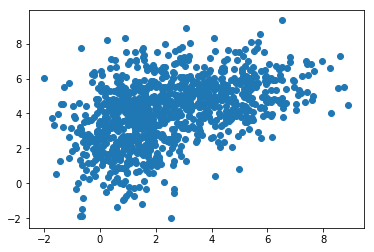

In [4]:
plt.scatter(dataset[:,0],dataset[:,1])
plt.show()

In [5]:
class Cluster:
    def __init__(self,center,color):
        self.center=center
        self.color=color
        self.points=list()
        
    def __repr__(self):
        return "cluster with color {}".format(self.color)
    
    def __str__(self):
        return "cluster with color {}".format(self.color)
    
    def update_center(self):
        if not self.points:
            return self.center
        
        new_center=np.array(self.points).mean(axis=0)
        self.center=new_center
        return self.center

In [6]:
k=5
cluster_centers=np.random.uniform(low=dataset.min(),high=dataset.max(),size=(k,dataset.shape[1]))
colors=["red","green","blue","orange","yellow"]

In [7]:
clusters=[]
for center,color in zip(cluster_centers,colors):
    clusters.append(Cluster(center,color))


In [8]:
print(clusters)

[cluster with color red, cluster with color green, cluster with color blue, cluster with color orange, cluster with color yellow]


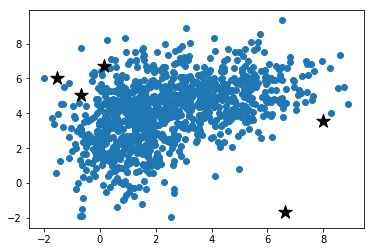

In [9]:
plt.scatter(dataset[:,0],dataset[:,1])
for c in clusters:
    plt.scatter(c.center[0],c.center[1],marker="*",color="black",s=200)
plt.show()

In [10]:
class KMeans:
    
    def __init__(self, k, clusters, dataset, centers):
        self.k = k
        self.clusters = clusters
        self.dataset = dataset
        self.centers = centers
        self.inertias = list()
        
    def run(self, iterations=1):
        for _ in range(iterations):
#             self.calculate_distances()
#             self.assign_cluster()
            self.assign_closest_cluster()
            self.update_cluster_centers()
            self.inertias.append(self.calculate_inertia())


    def assign_closest_cluster(self):
        for cluster in self.clusters:
            cluster.points = list()
            
        for point in self.dataset:
            
            distances = [] 
            
            for cluster in self.clusters:
                d = KMeans.euclidean(point, cluster.center)
                distances.append((d, cluster))
        
            distances = sorted(distances, key=lambda x: x[0])
            closest_cluster = distances[0][1]
            closest_cluster.points.append(point)
            
    def update_cluster_centers(self):
        new_centers = []
        for cluster in self.clusters:
#             new_center = np.array(cluster.points).mean(axis=0)
#             cluster.center = new_center
            new_centers.append(cluster.update_center())
        self.centers = new_centers
        
    
            
    def calculate_inertia(self):
        inertia = 0
        
        for cluster in self.clusters:
            for point in cluster.points:
                inertia += KMeans.euclidean(point, cluster.center)
        return inertia
    
            
    @staticmethod
    def euclidean(p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))

In [11]:
k=5
kmeans=KMeans(k,clusters,dataset,cluster_centers)

In [12]:
def plot_iteratively(kmeans, iterations=1):
    for i in range(iterations):
        kmeans.run()
        plt.figure()
        plt.title("Iteration {}".format(i))
        for cluster in kmeans.clusters:
            points = np.array(cluster.points)
            if not cluster.points:
                continue
            plt.scatter(points[:, 0], points[:, 1], color=cluster.color)
            plt.scatter(cluster.center[0], cluster.center[1], color='black', marker='^', s=100)
            
        plt.show()

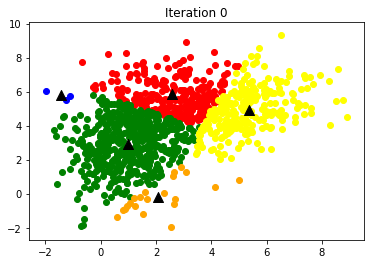

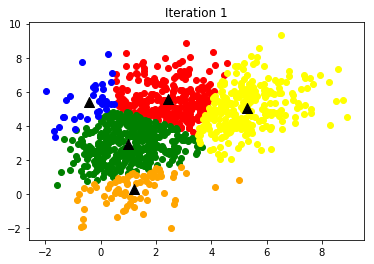

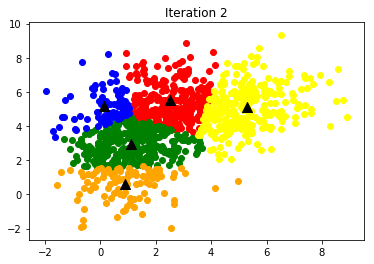

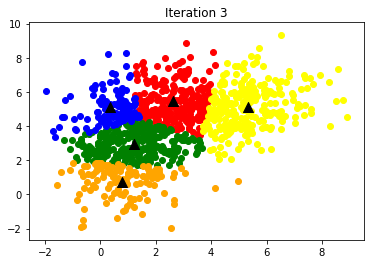

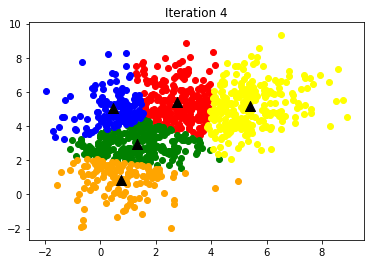

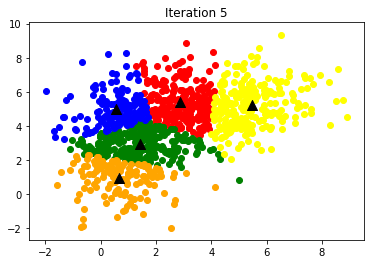

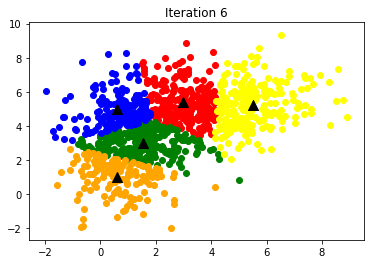

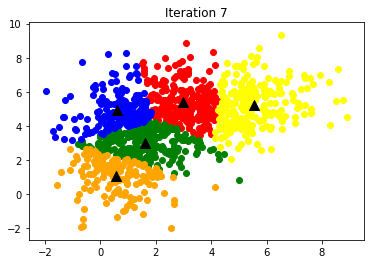

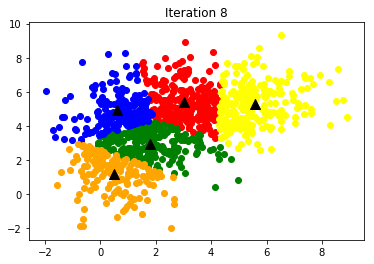

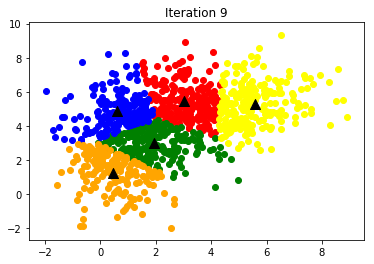

In [13]:
inertias=[]
plot_iteratively(kmeans,10)

In [14]:
kmeans.centers

[array([3.03420955, 5.4629666 ]),
 array([1.93151331, 2.97329792]),
 array([0.60466493, 4.88798632]),
 array([0.45876738, 1.251668  ]),
 array([5.58681644, 5.28532773])]

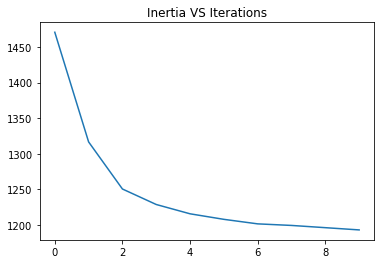

In [15]:
plt.figure()
plt.title("Inertia VS Iterations")
plt.plot(kmeans.inertias)
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
sk_kmeans = KMeans(n_clusters=5)
sk_kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
sk_kmeans.labels_

array([2, 0, 1, 2, 4, 3, 2, 4, 3, 3, 0, 0, 3, 3, 2, 3, 3, 0, 4, 2, 0, 0,
       3, 0, 0, 0, 2, 3, 2, 2, 0, 3, 3, 3, 3, 0, 0, 2, 2, 0, 2, 2, 4, 4,
       0, 1, 3, 3, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 3, 3, 3, 3, 0, 3, 2,
       4, 2, 2, 0, 3, 0, 3, 4, 3, 2, 0, 2, 1, 2, 0, 2, 2, 4, 2, 4, 2, 0,
       0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 3, 2,
       1, 0, 3, 0, 0, 2, 2, 0, 3, 4, 4, 2, 2, 0, 3, 0, 2, 0, 2, 3, 0, 2,
       2, 0, 0, 2, 2, 3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 0, 2, 3, 2, 2, 0, 0, 0, 3, 3, 4, 0, 4, 0, 4, 0, 2, 2, 2, 2, 3,
       0, 1, 4, 2, 3, 0, 0, 4, 0, 0, 0, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 3,
       2, 4, 2, 3, 0, 4, 3, 3, 0, 2, 2, 2, 3, 0, 2, 0, 3, 3, 2, 3, 3, 4,
       4, 3, 2, 0, 0, 2, 4, 2, 2, 4, 3, 0, 0, 4, 4, 4, 0, 3, 2, 0, 3, 0,
       3, 0, 3, 2, 2, 0, 2, 2, 3, 2, 0, 4, 2, 0, 2, 2, 2, 0, 3, 3, 2, 0,
       0, 0, 2, 0, 3, 2, 3, 4, 0, 2, 2, 0, 4, 3, 0, 0, 3, 3, 2, 2, 0, 2,
       3, 3, 4, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 3,

In [19]:
sk_kmeans.cluster_centers_

array([[3.85134696, 4.18976303],
       [0.86161865, 1.35279337],
       [5.86548939, 5.8406628 ],
       [1.99744494, 5.99067075],
       [0.80910537, 3.76776748]])

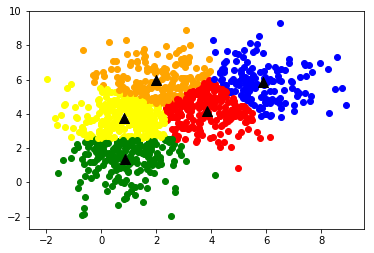

In [20]:
plt.figure()
for point,label in zip(dataset, sk_kmeans.labels_):
    plt.scatter(point[0], point[1], color=colors[label])
for center in sk_kmeans.cluster_centers_:
    plt.scatter(center[0], center[1], color='black', marker='^', s=100)
plt.show()